In [ ]:
#The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [4]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [5]:
#First check null values in dataset
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':"NoName"}, inplace=True)
df.fillna({'host_name':"NoName"}, inplace=True)
df.fillna({'last_review':"NotReviewed"}, inplace=True)

In [7]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
#to show all details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [9]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
#To check correlation value between input and output use corr()
df.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


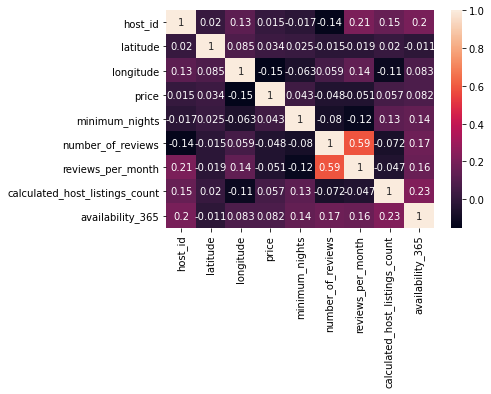

In [11]:
#visualise the correlation
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

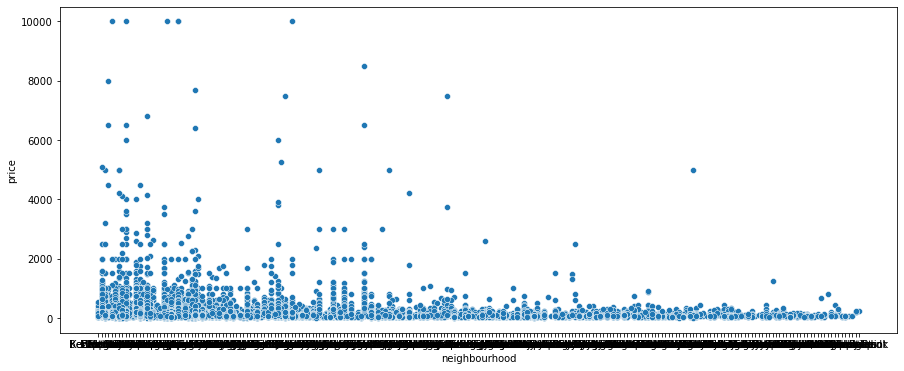

In [12]:
#scatterplot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df,x="neighbourhood",y="price")
plt.show()

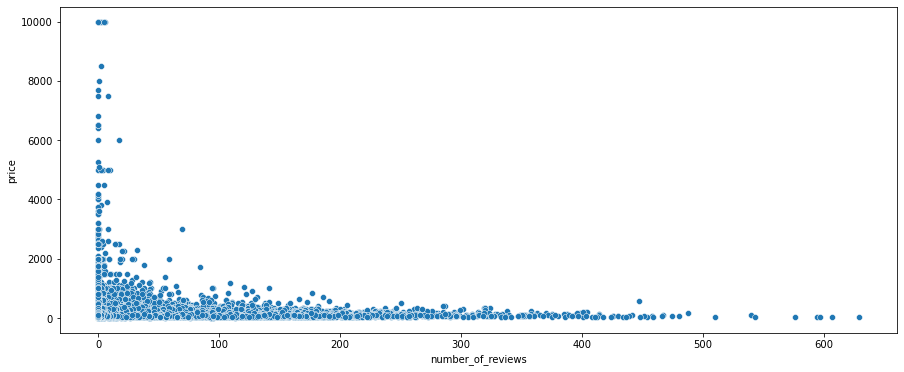

In [13]:
#scatterplot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df,x="number_of_reviews",y="price")
plt.show()

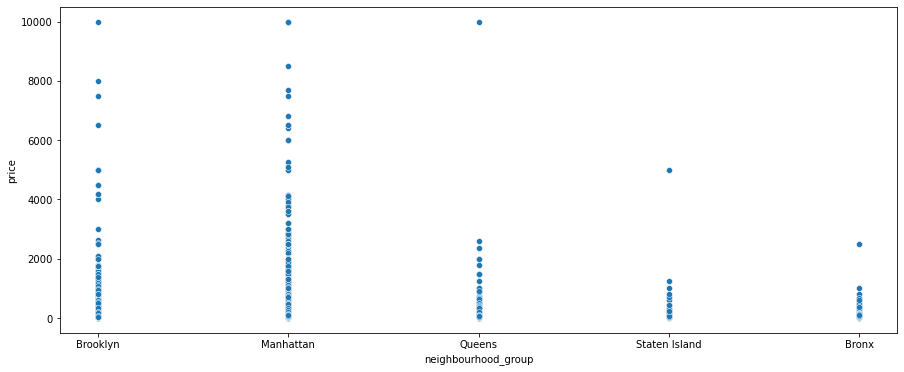

In [14]:
#scatterplot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df,x="neighbourhood_group",y="price")
plt.show()

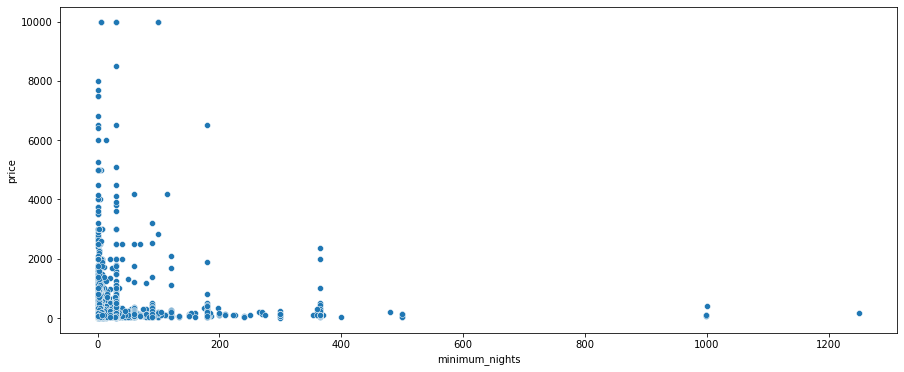

In [15]:
#scatterplot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df,x="minimum_nights",y="price")
plt.show()

In [16]:
# Base line Model = Linear Regression

In [17]:
df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes("object")

In [18]:
#we will separate independent and dependent variable 
#means select input and output variable from df
X=df_num.drop("price",axis=1)
Y=df_num["price"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#train test split
#now we will arrange to train and test the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [21]:
#we will call the linear regression class
from sklearn.linear_model import LinearRegression

In [22]:
#create object of LinearRegression
lr=LinearRegression()

In [23]:
lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
#we will test the data now
y_pred=lr.predict(X_test)

In [25]:
#Mean Squared Error Check
from sklearn.metrics import mean_squared_error

In [26]:
#mean_squared_Error
mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
print("Mean Squared Error :",mse)

Mean Squared Error : 57055.22893363851


In [27]:
#evaluation method of LinearRegression then use R2-score inbuilt method :
from sklearn.metrics import r2_score

In [28]:
#check coefficient /slope
lr.coef_

array([ 4.46727070e-08,  2.18236446e+02, -8.46162063e+02,  3.41544410e-02,
       -2.07115316e-01, -3.66049429e+00,  5.47686869e-02,  1.87760710e-01])

In [29]:
X.columns

Index(['host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [30]:
#check intercept 
lr.intercept_

-71327.18891527878

In [31]:
#assumption of Linear regression : there should be linear-relationship
#between input and output .
#here many input 
#trick , find residuals 
residuals=Y_test-y_pred
print(residuals)

18907    -30.093894
46663     67.505245
19757    -51.012693
9705      -7.182435
3322     287.909015
            ...    
12360    -66.228099
46855     18.381864
37553    -26.882302
15102    -92.713812
34586    -18.479459
Name: price, Length: 14669, dtype: float64


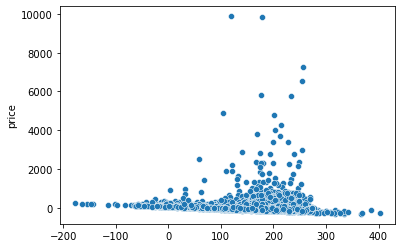

In [32]:
#relation check y_pred and residuals 
sns.scatterplot(y_pred,residuals)
plt.show()

Skewness :  19.608773136882252


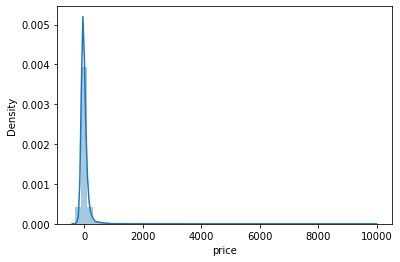

In [33]:
#3. Assumption : there should be a normal distributed curve means 
#no skewness means shold be symmetric curve
#distplot() means draw a N. D curve means frequency curve
from scipy.stats import skew
print("Skewness : ",skew(residuals))
sns.distplot(residuals)
plt.show()

In [34]:
#we can see normal distribution curve but with positive skewness

In [35]:
#Feature selection : - help to select imp features 
#feature_test user defined function
#first parameter score_func : criteria=f_regression if anova test and chi2 
#if chi-2 test
#second parameter : k means how many imp features from dataset
#model : Linear regression means classification
def feature_test(criteria,count,model):
    test = SelectKBest(score_func=criteria,k=count)
    X_train_new = test.fit_transform(X_train,Y_train)
    X_test_new = test.transform(X_test)
    
    model.fit(X_train_new,Y_train) #model train 
    y_pred = model.predict(X_test_new) #model test
    #mean_squared_Error
    mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
    print("Mean Squared Error :",mse)
    print(r2_score(Y_test,y_pred))
    print(test.get_support()) #show imp features
    #find residual
    residuals=Y_test-y_pred
    #relation check y_pred and residuals 
    sns.scatterplot(y_pred,residuals)
    plt.show()
    #check N.D curve
    from scipy.stats import skew
    print("Skewness : ",skew(residuals))
    sns.distplot(residuals)
    plt.show()
    return model

In [36]:
from sklearn.feature_selection import chi2 #chi-2 test
from sklearn.feature_selection import f_regression #ANova test
from sklearn.feature_selection import SelectKBest 

Mean Squared Error : 57362.49812831113
0.027448264446610415
[False False  True False False False False  True]


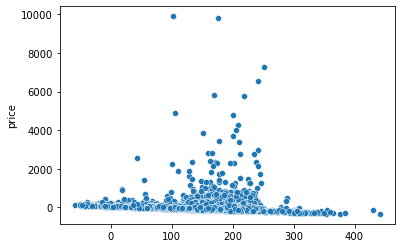

Skewness :  19.54083281169698


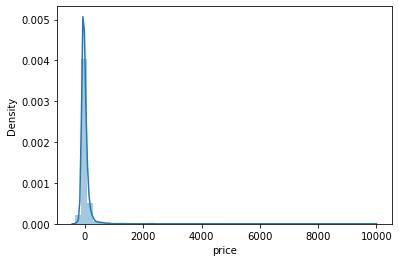

LinearRegression()

In [37]:
#Create object of LinearRegression class
lr=LinearRegression()
#call function
feature_test(f_regression,2,lr) #f_regression means =anova test and 2 : means
#no of imp features means k and lr means model train and test with Linear reg.

In [38]:
X=df[["number_of_reviews","minimum_nights"]] #input imp
cdf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'] )
cdf

,Coeff
number_of_reviews,-845.290137
minimum_nights,0.176486


In [39]:
#polynomial linear regression 

In [40]:
X=df[["number_of_reviews","minimum_nights"]]
Y=df["price"]

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
#Create the object of PolynomialFeatures (pass degree of X means increase the
#power of X)
pf=PolynomialFeatures(2)#2 means pass how much degress

In [43]:
X_poly=pf.fit_transform(X)

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.30,random_state=1)

In [45]:
#create object of LinearRegression class
lr=LinearRegression()

In [46]:
#train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [47]:
#test the model
y_pred=lr.predict(X_test)
#mean_squared_Error
mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
print("Mean Squared Error :",mse)
print("R2-score : ", r2_score(Y_test,y_pred))

Mean Squared Error : 58578.6775859997
R2-score :  0.006828565498463668


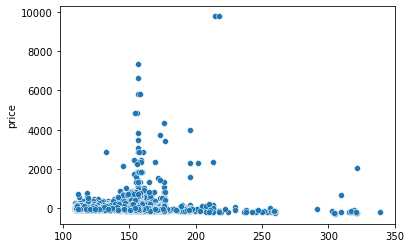

Skewness :  18.98176158038069


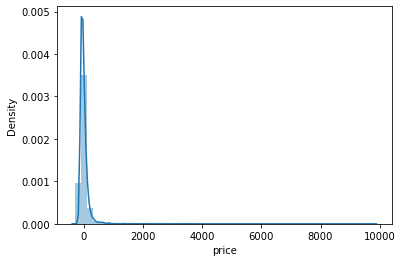

In [48]:
#find residual
residuals=Y_test-y_pred
#relation check y_pred and residuals 
sns.scatterplot(y_pred,residuals)
plt.show()
 #check N.D curve
from scipy.stats import skew
print("Skewness : ",skew(residuals))
sns.distplot(residuals)
plt.show()

In [49]:
#change the object type data into numerical type then use LabelEncoder class
from sklearn.preprocessing import LabelEncoder

In [50]:
for col in df_cat :
    le=LabelEncoder() #create the object of LabelEncoder class
    df_cat[col]=le.fit_transform(df_cat[col])

In [51]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,1,108,1
1,2,127,0
2,2,94,1
3,1,41,0
4,2,61,0


In [52]:
#concatenation of both dataset df_num and df_cat and hold new dataset df_new
df_new=pd.concat([df_num,df_cat],axis=1)

In [53]:
df_new.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365,1,108,1
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355,2,127,0
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365,2,94,1
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194,1,41,0
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0,2,61,0


In [54]:
from sklearn.linear_model import Lasso #lambda*sumof(abs(all coefficient))

In [55]:
#create object of Lasso class
#range of lambda/alpha (hyper parameter ) 200-1000
l1=Lasso(1000)#pass value of lambda

In [56]:
#train the model 
l1.fit(X_train,Y_train)

Lasso(alpha=1000)

In [57]:
#check the coefficient of all input features after training
#(add error on training time)
l1.coef_

array([ 0.        , -0.        ,  0.        , -0.00067103, -0.        ,
        0.00018456])

In [58]:
X.columns

Index(['number_of_reviews', 'minimum_nights'], dtype='object')

In [59]:
#How to select the right value of lambda/alpha   in Lasso regularization
for i in range(200,1001,50) :  #start=200 stop=1001-1=1000 and step=+50
     #create object of Lasso
    l1=Lasso(i)
    #train
    l1.fit(X_train,Y_train)
    print("Value of Lambda : ",i," Score : ",l1.score(X_test,Y_test))

Value of Lambda :  200  Score :  0.0014982388842799121
Value of Lambda :  250  Score :  0.0009281823618777496
Value of Lambda :  300  Score :  0.0009284074041717716
Value of Lambda :  350  Score :  0.0009286307799256655
Value of Lambda :  400  Score :  0.0009288524894119909
Value of Lambda :  450  Score :  0.0009290725323393145
Value of Lambda :  500  Score :  0.0009292909087046386
Value of Lambda :  550  Score :  0.0009295076183942763
Value of Lambda :  600  Score :  0.0009297226615262444
Value of Lambda :  650  Score :  0.0009299360381005428
Value of Lambda :  700  Score :  0.0009301477481170606
Value of Lambda :  750  Score :  0.0009303577915757977
Value of Lambda :  800  Score :  0.0009305661684767541
Value of Lambda :  850  Score :  0.0009307728788201519
Value of Lambda :  900  Score :  0.0009309779226057691
Value of Lambda :  950  Score :  0.0009311812998337166
Value of Lambda :  1000  Score :  0.0009313830105038834


In [60]:
#2. Ridge Regularization means L2 regularization 
#we add external error : lambda*sumof(square of(all coefficient)) in RSS
#range of lambda :  0 to 10
from sklearn.linear_model import Ridge #lambda*sumof(sqr(all coefficient))

In [61]:
#Before apply ridge regularization check coefficient 
lr.coef_

array([ 0.00000000e+00, -4.19108127e-01,  6.95173303e-01,  9.34524932e-04,
       -2.26295061e-03, -6.59576173e-04])

In [62]:
#create object of Ridge regularization class
l2=Ridge(10)#passing the value of lambda

In [63]:
#we train the model after add error
#train the model 
l2.fit(X_train,Y_train)

Ridge(alpha=10)

In [64]:
#Again check coefficient after apply ridge
l2.coef_

array([ 0.00000000e+00, -4.19107979e-01,  6.95172148e-01,  9.34524228e-04,
       -2.26294410e-03, -6.59574788e-04])

In [65]:
X.columns

Index(['number_of_reviews', 'minimum_nights'], dtype='object')

In [66]:
#How to select the right value of lambda/alpha   in Ridge regularization
for i in range(0,51) :  #start=0 stop=51-1=50 and step=+1
    #create object of Ridge
    l2=Ridge(i)
    #train
    l2.fit(X_train,Y_train)
    print("Value of Lambda : ",i," Score : ",l2.score(X_test,Y_test))

Value of Lambda :  0  Score :  0.006828565498463779
Value of Lambda :  1  Score :  0.006828565099563644
Value of Lambda :  2  Score :  0.006828564700663398
Value of Lambda :  3  Score :  0.0068285643017632625
Value of Lambda :  4  Score :  0.006828563902863349
Value of Lambda :  5  Score :  0.006828563503963214
Value of Lambda :  6  Score :  0.00682856310506319
Value of Lambda :  7  Score :  0.006828562706163388
Value of Lambda :  8  Score :  0.006828562307263364
Value of Lambda :  9  Score :  0.006828561908363673
Value of Lambda :  10  Score :  0.006828561509463871
Value of Lambda :  11  Score :  0.00682856111056418
Value of Lambda :  12  Score :  0.006828560711664711
Value of Lambda :  13  Score :  0.006828560312765131
Value of Lambda :  14  Score :  0.006828559913865662
Value of Lambda :  15  Score :  0.006828559514966304
Value of Lambda :  16  Score :  0.006828559116066613
Value of Lambda :  17  Score :  0.006828558717167366
Value of Lambda :  18  Score :  0.006828558318268119
Valu

In [67]:
#Cross validation

In [68]:
#call class
from sklearn.model_selection import cross_val_score
#cross_val_score inbuilt class

In [69]:
#Create the object of Lasso and Ridge regularization
l1=Lasso(200) #passing the value of lambda=200
l2=Ridge(2) #passing  the value of lambda/alpha=2

In [70]:
#apply cross validation on lasso regularisztion
#create the object of cross_val_score
l1=Lasso(200) #passing the value of lambda=200
l2=Ridge(2)  #cv means how many folds means how many 
#parts or iteration

In [71]:
l1_cross=cross_val_score(l1,X,Y,cv=4)

In [72]:
#check l1_cross
l1_cross

array([ 0.00040696, -0.00260679, -0.00269725, -0.00467562])

In [73]:
#apply cross validation onRTidge regularisztion
#create the object of cross_val_score
l2_cross=cross_val_score(l2,X,Y,cv=4) #cv means how many folds means how many 
#parts or iteration

In [74]:
#check
l2_cross

array([-0.00805505,  0.00125172, -0.00236938, -0.00068752])

In [75]:
#find the mean means average
np.mean(l2_cross)

-0.0024650603885490174